In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import csv

dataset = pd.read_csv('/content/csv images.csv')
dataset.describe()

In [62]:
dataset.columns.values

array(['docker image', 'Tag ', 'Created on ', 'Size', 'package manager ',
       'base image', '# alternative base imgs ', '# tested dependences ',
       '# valnarble dependeces  ', 'critical', 'high  ', 'medium ',
       'low ', '# of downloads', 'secure'], dtype=object)

In [124]:
import re


# Convert the column to string format
dataset['Size'] = dataset['Size'].astype(str)

# Step 1: Parse the string
def extract_value(x):
    m = re.match(r'(\d+)([KMG]B)', x)
    if m:
        value = int(m.group(1))
        unit = m.group(2)
        return value, unit
    else:
        return None, None

dataset['Size'] = dataset['Size'].apply(lambda x: extract_value(x))

# Step 2: Convert to bytes
def convert_to_bytes(x):
    if x[0] is not None and x[1] is not None:
        if x[1] == 'KB':
            return x[0] * 1024
        elif x[1] == 'MB':
            return x[0] * 1024 * 1024
        elif x[1] == 'GB':
            return x[0] * 1024 * 1024 * 1024
        elif x[1] == 'B':
            return x[0] * 1024 
    else:
        return None

dataset['Size'] = dataset['Size'].apply(lambda x: convert_to_bytes(x))

# Step 3: Normalize the values
max_value = dataset['Size'].max()
dataset['Size'] = dataset['Size'] / max_value

# Step 4: Scale the values
dataset['Size'] = dataset['Size'] * 10


In [125]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset['package manager '] = dataset['package manager '].astype(str)

# Perform label encoding on the 'category' column
le = LabelEncoder()
dataset['package manager '] = le.fit_transform(dataset['package manager '])


In [126]:
dataset['base image'] = dataset['base image'].str.split(':', expand=True)[0]

dataset['base image'] = le.fit_transform(dataset['base image'])


In [127]:
dataset['# of downloads'].astype('float')
dataset['# of downloads'] = dataset['# of downloads'] / dataset['# of downloads'].max()


In [128]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset['Tag '] = dataset['Tag '].astype(str)

# Perform label encoding on the 'category' column
le = LabelEncoder()
dataset['Tag '] = le.fit_transform(dataset['Tag '])
dataset['secure'] = le.fit_transform(dataset['secure'])


In [ ]:
df = dataset.dropna()
df

In [ ]:
X = df.drop(columns=['secure'], axis = 1)
y = df['secure']
X = X.drop(columns= ['docker image'], axis = 1)
X

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [132]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
rf.feature_importances_

array([0.00078947, 0.07009672, 0.12196292, 0.04698059, 0.04276778,
       0.39972114, 0.04524729, 0.03451795, 0.04980921, 0.11974144,
       0.02091995, 0.03135504, 0.0160905 ])

<BarContainer object of 13 artists>

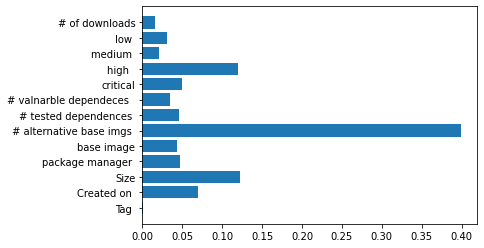

In [134]:
plt.barh(X.columns.values, rf.feature_importances_)


Text(0.5, 0, 'Random Forest Feature Importance')

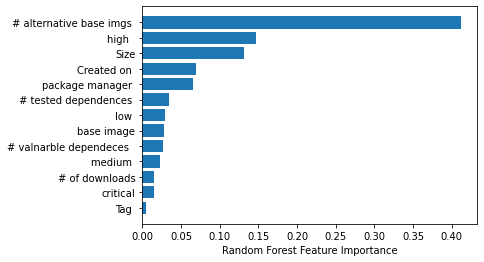

In [90]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns.values[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# **Permutation Based Feature Importance (with scikit-learn)**
https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=The%20feature%20importance%20can%20be%20plotted%20with%20more,feature%20importances%20with%20SHAP%20can%20be%20computationally%20expensive.




In [91]:
perm_importance = permutation_importance(rf, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

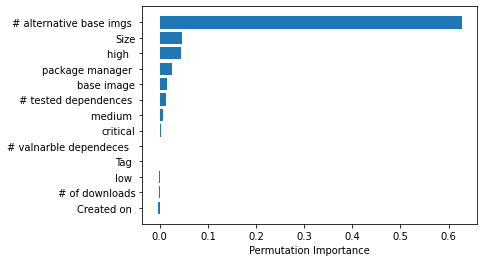

In [92]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns.values[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


# **Feature Importance Computed with SHAP Values**


In [135]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import shap 
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


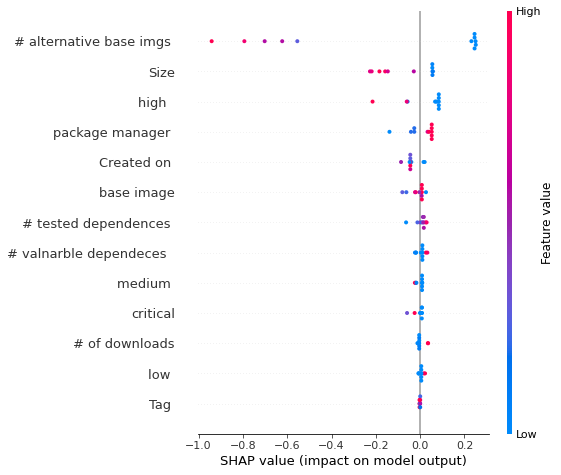

In [97]:
shap.summary_plot(shap_values, X_test)


# using this website .... 
https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=The%20feature%20importance%20can%20be%20plotted%20with%20more,feature%20importances%20with%20SHAP%20can%20be%20computationally%20expensive.

# another website to do the following 

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [137]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42
rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [138]:
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           2       0.86      1.00      0.92         6

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



In [140]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

In [141]:
cm_ = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



# Using Random Forests for Regression

In [142]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20, # 20 trees
                            max_depth=3, # 4 levels
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.28121487603305795
Mean Squared Error: 0.14981745229151017
Root Mean Squared Error: 0.3870625947976763


In [144]:
# Step 1: Import the necessary libraries and modules
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 4: Define the SVR model
svr = SVR(kernel='linear', C=1e3)

# Step 5: Train the SVR model
svr.fit(X_train, y_train)

# Step 6: Predict the target variable on the testing set
y_pred = svr.predict(X_test)

# Step 7: Evaluate the performance of the SVR model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: %.2f" % mse)
print("R-squared: %.2f" % r2)


Mean squared error: 1436.86
R-squared: -1447.84


In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# instantiate the kNN model with k=5
k = 5
model = KNeighborsRegressor(n_neighbors=k)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model's performance using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean squared error: 1.45
R-squared: -0.46


In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mse', optimizer='adam')

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


Epoch 1/100
2/2 [==============================] - 1s 466ms/step - loss: 49944.4375 - val_loss: 49953.5859
Epoch 2/100
2/2 [==============================] - 0s 56ms/step - loss: 38902.2031 - val_loss: 39138.9688
Epoch 3/100
2/2 [==============================] - 0s 79ms/step - loss: 30343.1074 - val_loss: 29924.2676
Epoch 4/100
2/2 [==============================] - 0s 100ms/step - loss: 23093.9531 - val_loss: 22127.0879
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 16995.0918 - val_loss: 15746.3438
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 12017.0586 - val_loss: 10631.8896
Epoch 7/100
2/2 [==============================] - 0s 41ms/step - loss: 8091.8809 - val_loss: 6725.8496
Epoch 8/100
2/2 [==============================] - 0s 37ms/step - loss: 5114.7324 - val_loss: 3958.0920
Epoch 9/100
2/2 [==============================] - 0s 35ms/step - loss: 3056.5081 - val_loss: 2172.0210
Epoch 10/100
2/2 [==============================] 

In [147]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# define the kernel function for GPR
kernel = RBF()

# build the GPR model
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# fit the model on training data
gpr.fit(X_train, y_train)

# predict on test data
y_pred = gpr.predict(X_test)

# calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



RMSE: 1.0593100933235238
R-squared: -0.13148902276556873


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=12)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the classification metrics with average='weighted'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.73
Precision: 0.89
Recall: 0.73
F1 Score: 0.80


Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [151]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming we have a dataset X
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
inertia = kmeans.inertia_

print("Inertia: ", inertia)


Inertia:  6950801.241201734


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create KMeans object with desired number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the KMeans model to the data
kmeans.fit(X)

# Calculate the silhouette score for the KMeans model
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("The average silhouette score is:", silhouette_avg)


The average silhouette score is: 0.6884275564042464


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [153]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# assume X_train, X_test, y_train, y_test are already defined

# define the model
model = xgb.XGBClassifier()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate the error rate
cm = confusion_matrix(y_test, y_pred)
error_rate = 1 - cm.diagonal().sum() / cm.sum()
print("Error rate:", error_rate)


Accuracy: 0.8181818181818182
Error rate: 0.18181818181818177
